In [1]:
# Libraries
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
import random

Newton's law of Gravity:
$$\vec{F} = - G\frac{m_1m_2}{|\vec{r}|^2}\hat{r}$$
where:$$\vec{r} = \vec{r}_1 - \vec{r}_2$$ $$\hat{r} = \frac{\vec{r}}{|\vec{r}|}$$

# Functions

In [117]:
# Creating a Class that will hold the information of the planetary system objects such as planets and stars
class SystObj:
    def __init__(self, mass = float, position = np.array, momentum = np.array):
        self.mass = mass
        self.position = position
        self.momentum = momentum

# Creating a function that calculates gravitational force between objects
def gravforce(G = float, obj1 = SystObj, obj2 = SystObj):
    '''Calculates the gravitational force between two objects.'''
    # Distance vector between the two objects
    dis_vec = obj1.position - obj2.position
    # Calculating the magnitude of the distance vector
    dis_mag = np.linalg.norm(dis_vec)
    # Calculating the unit distance vector:
    unit_vec = dis_vec/dis_mag
    # Calculating the force vector:
    force_vec = -1*G*(obj1.mass*obj2.mass/dis_mag**2)*unit_vec
    return force_vec

# Kinectic energy calculator:
def KinEn(obj = SystObj):
    '''Calculates the Kinetic energy of an object.'''
    kinetic = 0.5*np.linalg.norm(obj.momentum)**2/obj.mass

    return kinetic

def PotEn(G, obj1 = SystObj, obj2 = SystObj):
    '''Calculates the gravitational ponetial energy between two objects.'''
    # Distance vector
    dis_vec = obj1.position - obj2.position
    # Calculating the magnitude of the distance vector
    dis_mag = np.linalg.norm(dis_vec)
    # Calculate gravitational potential energy.
    potential = -G*obj1.mass*obj2.mass/dis_mag

    return potential

# One-planet one-star dynamics simulator
def OnePlanetSym(time = int, star = SystObj, planet = SystObj, G = float):
    '''Simulates the dynamics of a one-planet one-star system. Time is given in years'''
    daysec = 24.0*60*60
    dt = 1*daysec # The timestep
    t = 0
    
    star_position_history = [list(star.position)] # The star's positions at given time
    planet_position_history = [list(planet.position)] # The planet's position at given time
    planet_kinetic_energy = [KinEn(planet)] # The planet's kinetic energy at given time
    star_kinetic_energy = [KinEn(star)] # The star's kinetic energy at given time 
    total_energy = [KinEn(planet) + KinEn(star) + PotEn(G, star, planet)] # The total energy of the system at given time
    time_list = [t] # time
    
    # Simulation
    while t<time*daysec*364:
        # Calculate the force between objects
        starforce = gravforce(G, star, planet)
        planetforce = gravforce(G, planet, star)
        # Update momentum:
        star.momentum = star.momentum + starforce*dt 
        planet.momentum = planet.momentum + planetforce*dt 
        # Update position
        star.position = star.position + (star.momentum/star.mass)*dt 
        planet.position = planet.position + (planet.momentum/planet.mass)*dt
        # Record the position of the objects 
        star_position_history.append(list(star.position))
        planet_position_history.append(list(planet.position))
        # Calculating energies:
        planet_kin = KinEn(planet)
        star_kin = KinEn(star)
        tot_en = planet_kin + star_kin + PotEn(G, star, planet)
        planet_kinetic_energy.append(planet_kin)
        star_kinetic_energy.append(star_kin)
        total_energy.append(tot_en)

        t +=dt
        time_list.append(t)

    return np.array(star_position_history), np.array(planet_position_history), np.array(planet_kinetic_energy), np.array(star_kinetic_energy), np.array(total_energy), np.array(time_list)/daysec

def TwoPlanetSim(time = int, star = SystObj, planet1 = SystObj, planet2 = SystObj, G = float):
    '''Simulates the dynamics of a two-planet one-star system. Time is given in years'''
    # The simulation
    AU = 1.5e11
    daysec = 24.0*60*60 
    dt = 1*daysec
    t = 0
    star_position_history = [list(star.position)]
    planet1_position_history = [list(planet1.position)]
    planet2_position_history = [list(planet2.position)]
    planet1_kinetic_energy = [KinEn(planet1)] # The planet's kinetic energy at given time
    planet2_kinetic_energy = [KinEn(planet2)]
    star_kinetic_energy = [KinEn(star)] # The star's kinetic energy at given time 
    total_energy = [KinEn(planet1) + KinEn(planet2) + KinEn(star) + PotEn(G, star, planet1) + PotEn(G, star, planet2) + PotEn(G, planet1, planet2)] # The total energy of the system at given time
    time_list = [t] # time
    
    
    while t<time*364*daysec:
        # Calculate the force between objects
        starforce = gravforce(G, star, planet1) + gravforce(G, star, planet2)
        planet1force = gravforce(G, planet1, star) + gravforce(G, planet1, planet2)
        planet2force = gravforce(G, planet2, star) + gravforce(G, planet2, planet1)
        # Update momentum:
        star.momentum = star.momentum + starforce*dt
        planet1.momentum = planet1.momentum + planet1force*dt
        planet2.momentum = planet2.momentum + planet2force*dt
        # Update position
        star.position = star.position + (star.momentum/star.mass)*dt
        planet1.position = planet1.position + (planet1.momentum/planet1.mass)*dt
        planet2.position = planet2.position + (planet2.momentum/planet2.mass)*dt
        # Record the position of the objects
        star_position_history.append(list(star.position))
        planet1_position_history.append(list(planet1.position))
        planet2_position_history.append(list(planet2.position))
        # Calculating energies
        planet1_kin = KinEn(planet1)
        planet2_kin = KinEn(planet2)
        star_kin = KinEn(star)
        tot_en = planet1_kin + planet2_kin + star_kin + PotEn(G, star, planet1) + PotEn(G, star, planet2) + PotEn(G, planet1, planet2)
        planet1_kinetic_energy.append(planet1_kin)
        planet2_kinetic_energy.append(planet2_kin)
        star_kinetic_energy.append(star_kin)
        total_energy.append(tot_en)

        t +=dt
        time_list.append(t)

    return np.array(star_position_history), np.array(planet1_position_history), np.array(planet2_position_history), np.array(planet1_kinetic_energy), np.array(planet2_kinetic_energy), np.array(star_kinetic_energy), np.array(total_energy), np.array(time_list)/daysec

# Planatary Data Used during the simulation

In [236]:
G = 6.67e-11 # Gravitational constant
AU = 1.5e11 # Astronomical unit in meter
# Sun:
sun_mass = 2.0e30 #kg
# Earth:
earth_aphelion_distance = 1.0167 * AU
earth_mass = 5.972e24
earth_aphelion_velocity = 29290
earth_aphelion_momenta = earth_aphelion_velocity * earth_mass
# Venus:
Venus_aphelion_distance =  0.72823128 * AU
Venus_mass = 0.64169e24
Venus_aphelion_velocity = 35784
Venus_aphelion_momenta = Venus_aphelion_velocity * Venus_mass
# Mars
Mars_aphelion_distance =  1.5236623 * AU
Mars_mass = 4.86732e24
Mars_aphelion_velocity = 24077
Mars_aphelion_momenta = Mars_aphelion_velocity * Mars_mass
# Saturn:
Saturn_aphelion_distance =  10.1238* AU
Saturn_mass = 5.6834e26
Saturn_aphelion_velocity = 9030
Saturn_aphelion_momenta = Saturn_aphelion_velocity * Saturn_mass

In [280]:
#Simulation
Sun = SystObj(sun_mass, np.array([0,0]), np.array([0,0]))
Earth = SystObj(earth_mass, np.array([earth_aphelion_distance,0]), np.array([0,earth_aphelion_momenta]))
Venus = SystObj(Venus_mass, np.array([Venus_aphelion_distance,0]), np.array([0,Venus_aphelion_momenta]))
Mars = SystObj(Mars_mass, np.array([Mars_aphelion_distance,0]), np.array([0,Mars_aphelion_momenta]))
Saturn = SystObj(Saturn_mass, np.array([Saturn_aphelion_distance/2,0]), np.array([0,Saturn_aphelion_momenta]))

Es, pE, eK, sk, Ee, t = OnePlanetSym(6, Sun, Saturn, G)
#sV, pV = OnePlanetSym(1, Sun, Venus, G)
#sS, pS = OnePlanetSym(30, Sun, Saturn, G)

(-1.8566384430813863,
 5.391354211575304,
 -3.0589583861167866,
 3.0587373006190046)

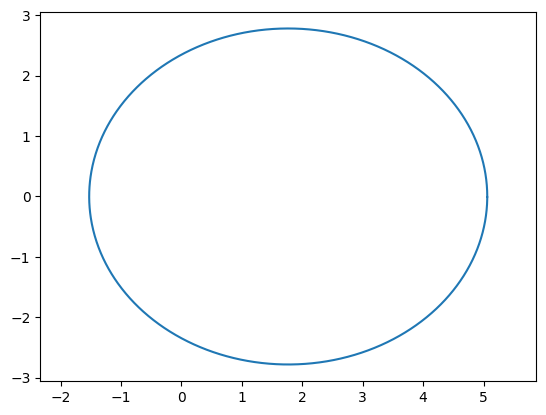

In [281]:
plt.plot(pE[:,0]/AU, pE[:,1]/AU)
plt.axis("equal")

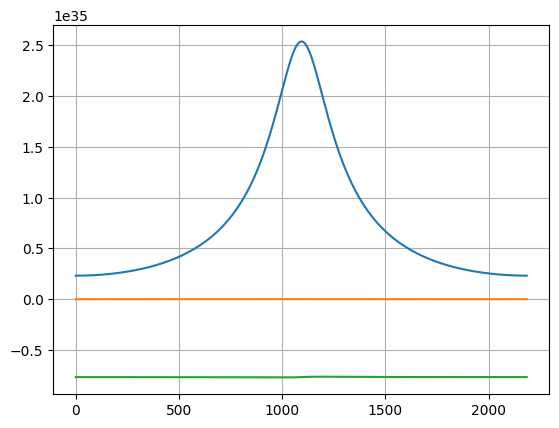

In [282]:
plt.plot(t, eK)
plt.plot(t, sk)
plt.plot(t, Ee)
plt.grid()

In [294]:
Sun = SystObj(sun_mass, np.array([0,0]), np.array([0,0]))
Earth = SystObj(earth_mass, np.array([earth_aphelion_distance,0]), np.array([0,earth_aphelion_momenta]))
Venus = SystObj(Venus_mass, np.array([Venus_aphelion_distance,0]), np.array([0,Venus_aphelion_momenta]))
Saturn = SystObj(Saturn_mass, np.array([Saturn_aphelion_distance,0]), np.array([0,Saturn_aphelion_momenta]))

EVs, EVp1, EVp2, EVp1k, EVp2k, EVsk, EVe, EVt  = TwoPlanetSim(3, Sun, Earth, Venus, G)

In [295]:
EVp2k

array([4.10840308e+32, 4.11139655e+32, 4.11409862e+32, ...,
       3.41991764e+32, 3.41545892e+32, 3.41118829e+32])

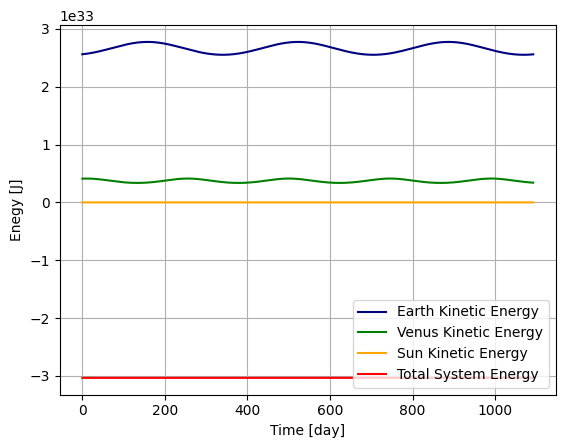

In [296]:
plt.plot(EVt, EVp1k, color = "navy", label = "Earth Kinetic Energy")
plt.plot(EVt, EVp2k, color = "green", label = "Venus Kinetic Energy")
plt.plot(EVt, EVsk, color = "orange", label = "Sun Kinetic Energy")
plt.plot(EVt, EVe, color = "red", label = "Total System Energy")
plt.xlabel("Time [day]")
plt.ylabel("Enegy [J]")
plt.grid()
plt.legend(loc = 'lower right')

# One Planet animation

In [6]:
posx_planet = pE[:,0]/AU
posy_planet = pE[:,1]/AU
posx_sun = Es[:,0]/AU
posy_sun = Es[:,1]/AU

fig = plt.figure(figsize=(5,5))

l_p, = plt.plot([],[], 'k-', color = "blue")
point_e, = plt.plot([], [], marker="o", markersize=6, markeredgecolor="blue", markerfacecolor="blue")
point_s, = plt.plot([], [], marker="o", markersize=12, markeredgecolor="orange", markerfacecolor="orange")
l_s, = plt.plot([],[], 'k-', color = "orange")
plt.xlim(-max(posx_planet)*1.2,max(posx_planet)*1.2)
plt.ylim(-max(posy_planet)*1.2,max(posy_planet)*1.2)
writer = PillowWriter(fps = 30)
plt.grid()

xplanet = []
yplanet = []
xstar = []
ystar = []
with writer.saving(fig, "OnePlanet.gif", 100):
    for i in range(0,len(posx_planet)):
        xplanet.append(posx_planet[i])
        yplanet.append(posy_planet[i])
        xstar.append(posx_sun[i])
        ystar.append(posy_sun[i])

        l_p.set_data(xplanet, yplanet)
        l_s.set_data(xstar, ystar)
        writer.grab_frame()

        point_e.set_data(posx_planet[i], posy_planet[i])
        point_s.set_data(posx_sun[i], posy_sun[i])

NameError: name 'p1' is not defined

# 2 Planet Animation

C:\Users\jmton\AppData\Local\Temp\ipykernel_13940\2139824295.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  l_p1, = plt.plot([],[], 'k-', color = "blue", lw = 1)
C:\Users\jmton\AppData\Local\Temp\ipykernel_13940\2139824295.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  l_p2, = plt.plot([],[], 'k-', color = "green", lw = 1)
C:\Users\jmton\AppData\Local\Temp\ipykernel_13940\2139824295.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  l_s, = plt.plot([],[], 'k-', color = "orange")


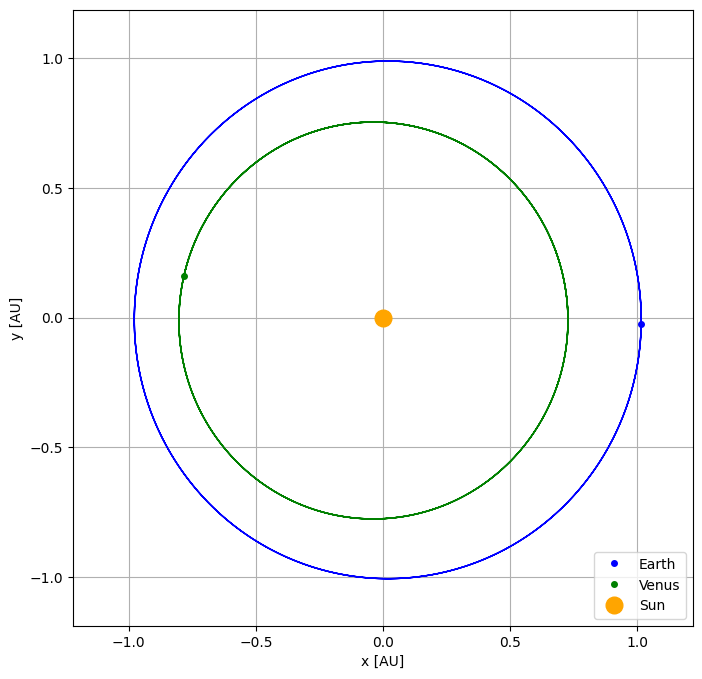

In [301]:
posx_planet1 = EVp1[:,0]/AU
posy_planet1 = EVp1[:,1]/AU
posx_planet2 = EVp2[:,0]/AU
posy_planet2 = EVp2[:,1]/AU
posx_sun = EVs[:,0]/AU
posy_sun = EVs[:,1]/AU

fig = plt.figure(figsize=(8,8))

l_p1, = plt.plot([],[], 'k-', color = "blue", lw = 1)
l_p2, = plt.plot([],[], 'k-', color = "green", lw = 1)
point_p1, = plt.plot([], [], marker="o", markersize=4, markeredgecolor="blue", markerfacecolor="blue", label = "Earth", color = "blue", ls = "")
point_p2, = plt.plot([], [], marker="o", markersize=4, markeredgecolor="green", markerfacecolor="green", label = "Venus", color = "green", ls = "")
point_s, = plt.plot([], [], marker="o", markersize=12, markeredgecolor="orange", markerfacecolor="orange", color = "orange", label = "Sun", ls = "")
l_s, = plt.plot([],[], 'k-', color = "orange")
plt.xlim(-max(posx_planet1)*1.2,max(posx_planet1)*1.2)
plt.ylim(-max(posy_planet1)*1.2,max(posy_planet1)*1.2)
plt.xlabel("x [AU]")
plt.ylabel("y [AU]")
plt.legend(loc = "lower right")
writer = PillowWriter(fps = 30)
plt.grid()

xplanet1 = []
yplanet1 = []
xplanet2 = []
yplanet2 = []
xstar = []
ystar = []
with writer.saving(fig, "TwoPlanet.gif", 100):
    for i in range(0,len(posx_planet1)):
        xplanet1.append(posx_planet1[i])
        yplanet1.append(posy_planet1[i])
        xplanet2.append(posx_planet2[i])
        yplanet2.append(posy_planet2[i])
        xstar.append(posx_sun[i])
        ystar.append(posy_sun[i])

        l_p1.set_data(xplanet1, yplanet1)
        l_p2.set_data(xplanet2, yplanet2)
        l_s.set_data(xstar, ystar)
        writer.grab_frame()

        point_p2.set_data(posx_planet2[i], posy_planet2[i])
        point_p1.set_data(posx_planet1[i], posy_planet1[i])
        point_s.set_data(posx_sun[i], posy_sun[i])
